In [1]:
from tensorly.metrics.regression import RMSE
from tensorly.decomposition import parafac
import time
import scipy.io
import tensorly as tl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tensorly.cp_tensor import CPTensor
from parafac_normalization_comparison import *

#parameters
init='svd'
svd='numpy_svd'
rank=10

#hyperspectral image
mat = scipy.io.loadmat('/home/ctuna/tensoptly/benchmark_data/Hyperspectral/Indian_pines_corrected.mat')
image=mat['indian_pines_corrected']

tensor=tl.tensor(image,dtype='float')

1. Method from PR
2. Inner loop normalization with last factor normalization after inner loop
3. Normalization at the end
4. 2 and 3 together
5. Current tensorly normalization

In [2]:
#normalized improved parafac result
tic = time.time()
tensornorm1, errorsnorm1, weights_iter1 = parafac_normalize_1(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
weightsnorm1, factorsnorm1 = tensornorm1
cp_reconstructionnorm1 = tl.cp_to_tensor((weightsnorm1, factorsnorm1))
time_cp1 = time.time()-tic


#normalized improved parafac result
tic = time.time()
tensornorm2, errorsnorm2, weights_iter2 = parafac_normalize_2(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
weightsnorm2, factorsnorm2 = tensornorm2
cp_reconstructionnorm2 = tl.cp_to_tensor((weightsnorm2, factorsnorm2))
time_cp2 = time.time()-tic


#normalized improved parafac result
tic = time.time()
tensornorm3, errorsnorm3, weights_iter3 = parafac_normalize_3(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
weightsnorm3, factorsnorm3 = tensornorm3
cp_reconstructionnorm3 = tl.cp_to_tensor((weightsnorm3, factorsnorm3))
time_cp3 = time.time()-tic


#normalized improved parafac result
tic = time.time()
tensornorm4, errorsnorm4, weights_iter4 = parafac_normalize_4(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
weightsnorm4, factorsnorm4 = tensornorm4
cp_reconstructionnorm4 = tl.cp_to_tensor((weightsnorm4, factorsnorm4))
time_cp4 = time.time()-tic


#normalized improved parafac result
tic = time.time()
tensornorm5, errorsnorm5, weights_iter5 = parafac_normalize_5(tensor, rank=rank, init=init, normalize_factors=True, return_errors=True)
weightsnorm5, factorsnorm5 = tensornorm5
cp_reconstructionnorm5 = tl.cp_to_tensor((weightsnorm5, factorsnorm5))
time_cp5 = time.time()-tic

# Error per iteration 

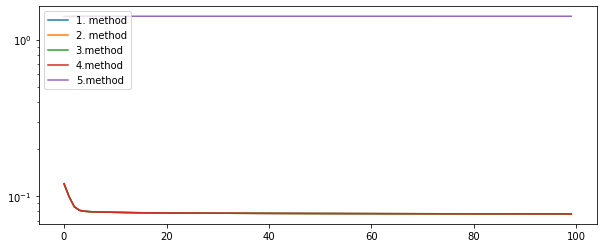

In [3]:
each_iteration(errorsnorm1, errorsnorm2, errorsnorm3, errorsnorm4, errorsnorm5)

# Weights per iteration 

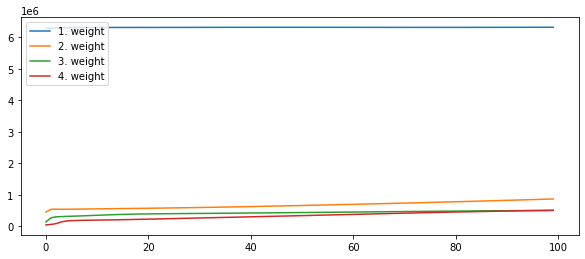

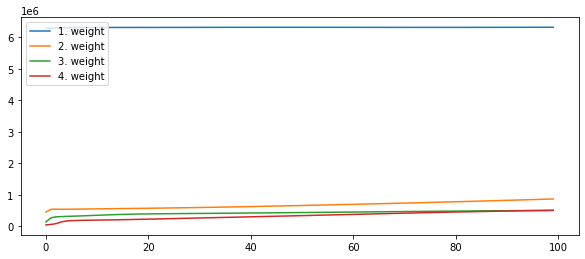

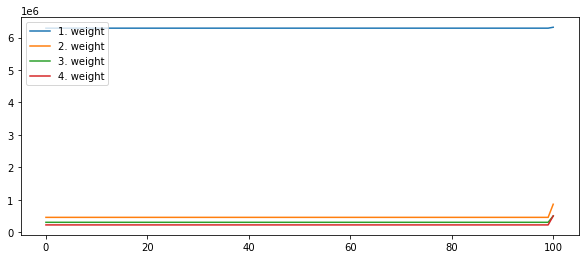

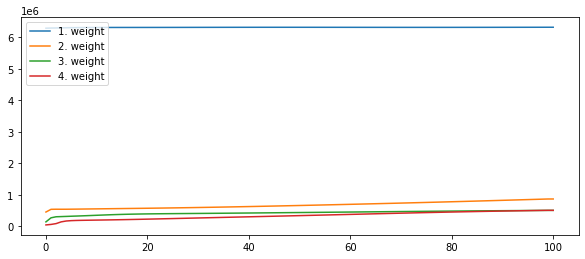

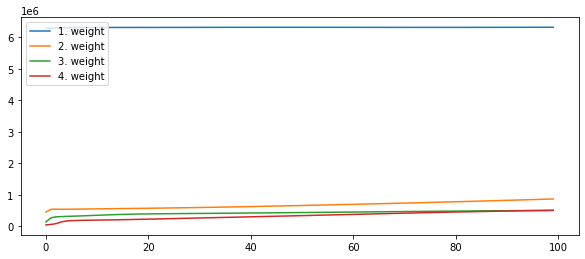

In [4]:
plot_weights(weights_iter1)
plot_weights(weights_iter2)
plot_weights(weights_iter3)
plot_weights(weights_iter4)
plot_weights(weights_iter5)

# Last weights

In [5]:
print(weightsnorm1[:5])
print(weightsnorm2[:5])
print(weightsnorm3[:5])
print(weightsnorm4[:5])
print(weightsnorm5[:5])

[6316737.70313622  867239.70610125  505517.43297957  507516.05355295
  443708.99404314]
[6316737.70313369  867239.70610012  505517.4329814   507516.05355735
  443708.99404379]
[6316737.70313865  867239.70610214  505517.43297862  507516.05354933
  443708.9940428 ]
[6316737.70313315  867239.70609935  505517.4329825   507516.05355862
  443708.99404431]
[6316737.70314132  867239.7061017   505517.43297911  507516.05354572
  443708.99404269]


# Mean of factors

In [6]:
print(tl.mean(factorsnorm1[0]), tl.mean(factorsnorm1[1]), tl.mean(factorsnorm1[2]))
print(tl.mean(factorsnorm2[0]), tl.mean(factorsnorm2[1]), tl.mean(factorsnorm2[2]))
print(tl.mean(factorsnorm3[0]), tl.mean(factorsnorm3[1]), tl.mean(factorsnorm3[2]))
print(tl.mean(factorsnorm4[0]), tl.mean(factorsnorm4[1]), tl.mean(factorsnorm4[2]))
print(tl.mean(factorsnorm5[0]), tl.mean(factorsnorm5[1]), tl.mean(factorsnorm5[2]))

0.016206516610332906 0.012192372354811933 0.00031920864892070176
-0.010925992052446125 -0.01577506562271412 0.015247241857363477
-0.005895617938310242 0.01938375990602917 0.001602174006595762
0.002216543475728475 0.024595759086712788 0.0056626611293226995
-0.005378174590853807 0.009213458185977982 0.004062790728091108


In [7]:
print(RMSE(tensor,cp_reconstructionnorm1))
print(RMSE(tensor,cp_reconstructionnorm2))
print(RMSE(tensor,cp_reconstructionnorm3))
print(RMSE(tensor,cp_reconstructionnorm4))
print(RMSE(tensor,cp_reconstructionnorm5))

238.75580985788972
238.7558098578987
238.75580985788287
238.75580985790256
238.75580985787963


In [8]:
print(str(time_cp1))
print(str(time_cp2))
print(str(time_cp3))
print(str(time_cp4))
print(str(time_cp5))

49.094162940979004
54.75162959098816
54.147287368774414
55.358052253723145
57.51103210449219
